In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [3]:
mpg_df=pd.read_csv('car-mpg.csv')

In [4]:
#check top few records
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
# getting the car_name in the index 

mpg_df1=pd.read_csv('car-mpg.csv',index_col=9)

In [6]:
mpg_df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
car_name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


In [7]:
#droping column car name
mpg_df = mpg_df.drop('car_name',axis=1)

In [8]:
#checking structure of dataframe
mpg_df.shape

(398, 9)

In [9]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [10]:
mpg_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [11]:
mpg_df['car_type'].value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [12]:
mpg_df['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [13]:
# replace the number in categorical variables with the actual countrynames in the 

mpg_df['origin']=mpg_df['origin'].replace({1:'america',2:'europe',3:'asia'})

In [14]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


In [15]:
mpg_df['origin'].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [16]:
#convert categorical variable into dummy /indicator variable (one hot encoding)

mpg_df=pd.get_dummies(mpg_df,columns=['origin'])

In [17]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [18]:
#lets analyze the data

mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [19]:
# note hp column is missing

In [20]:
mpg_df['hp']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [21]:
# treating the missing value in hp
temp= pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [22]:
# on inspecting records number 32,126,etc, we find "? in the columns"
#replace the ? wit nan
mpg_df = mpg_df.replace('?',np.nan)

In [23]:
#replace the missing value of hp with the median value of hp
mpg_df = mpg_df.fillna(mpg_df.median())

In [24]:
# the hp column was treated as an object when data was loaded in the data frame
mpg_df['hp']=mpg_df['hp'].astype('float64')
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


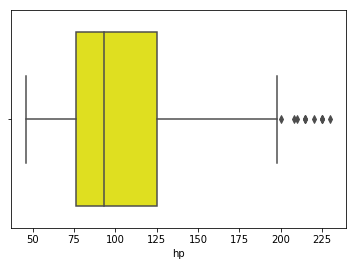

In [26]:
# creating boxplot 
sns.boxplot(mpg_df.hp,color="yellow",orient="h")

C:\Users\AKSHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


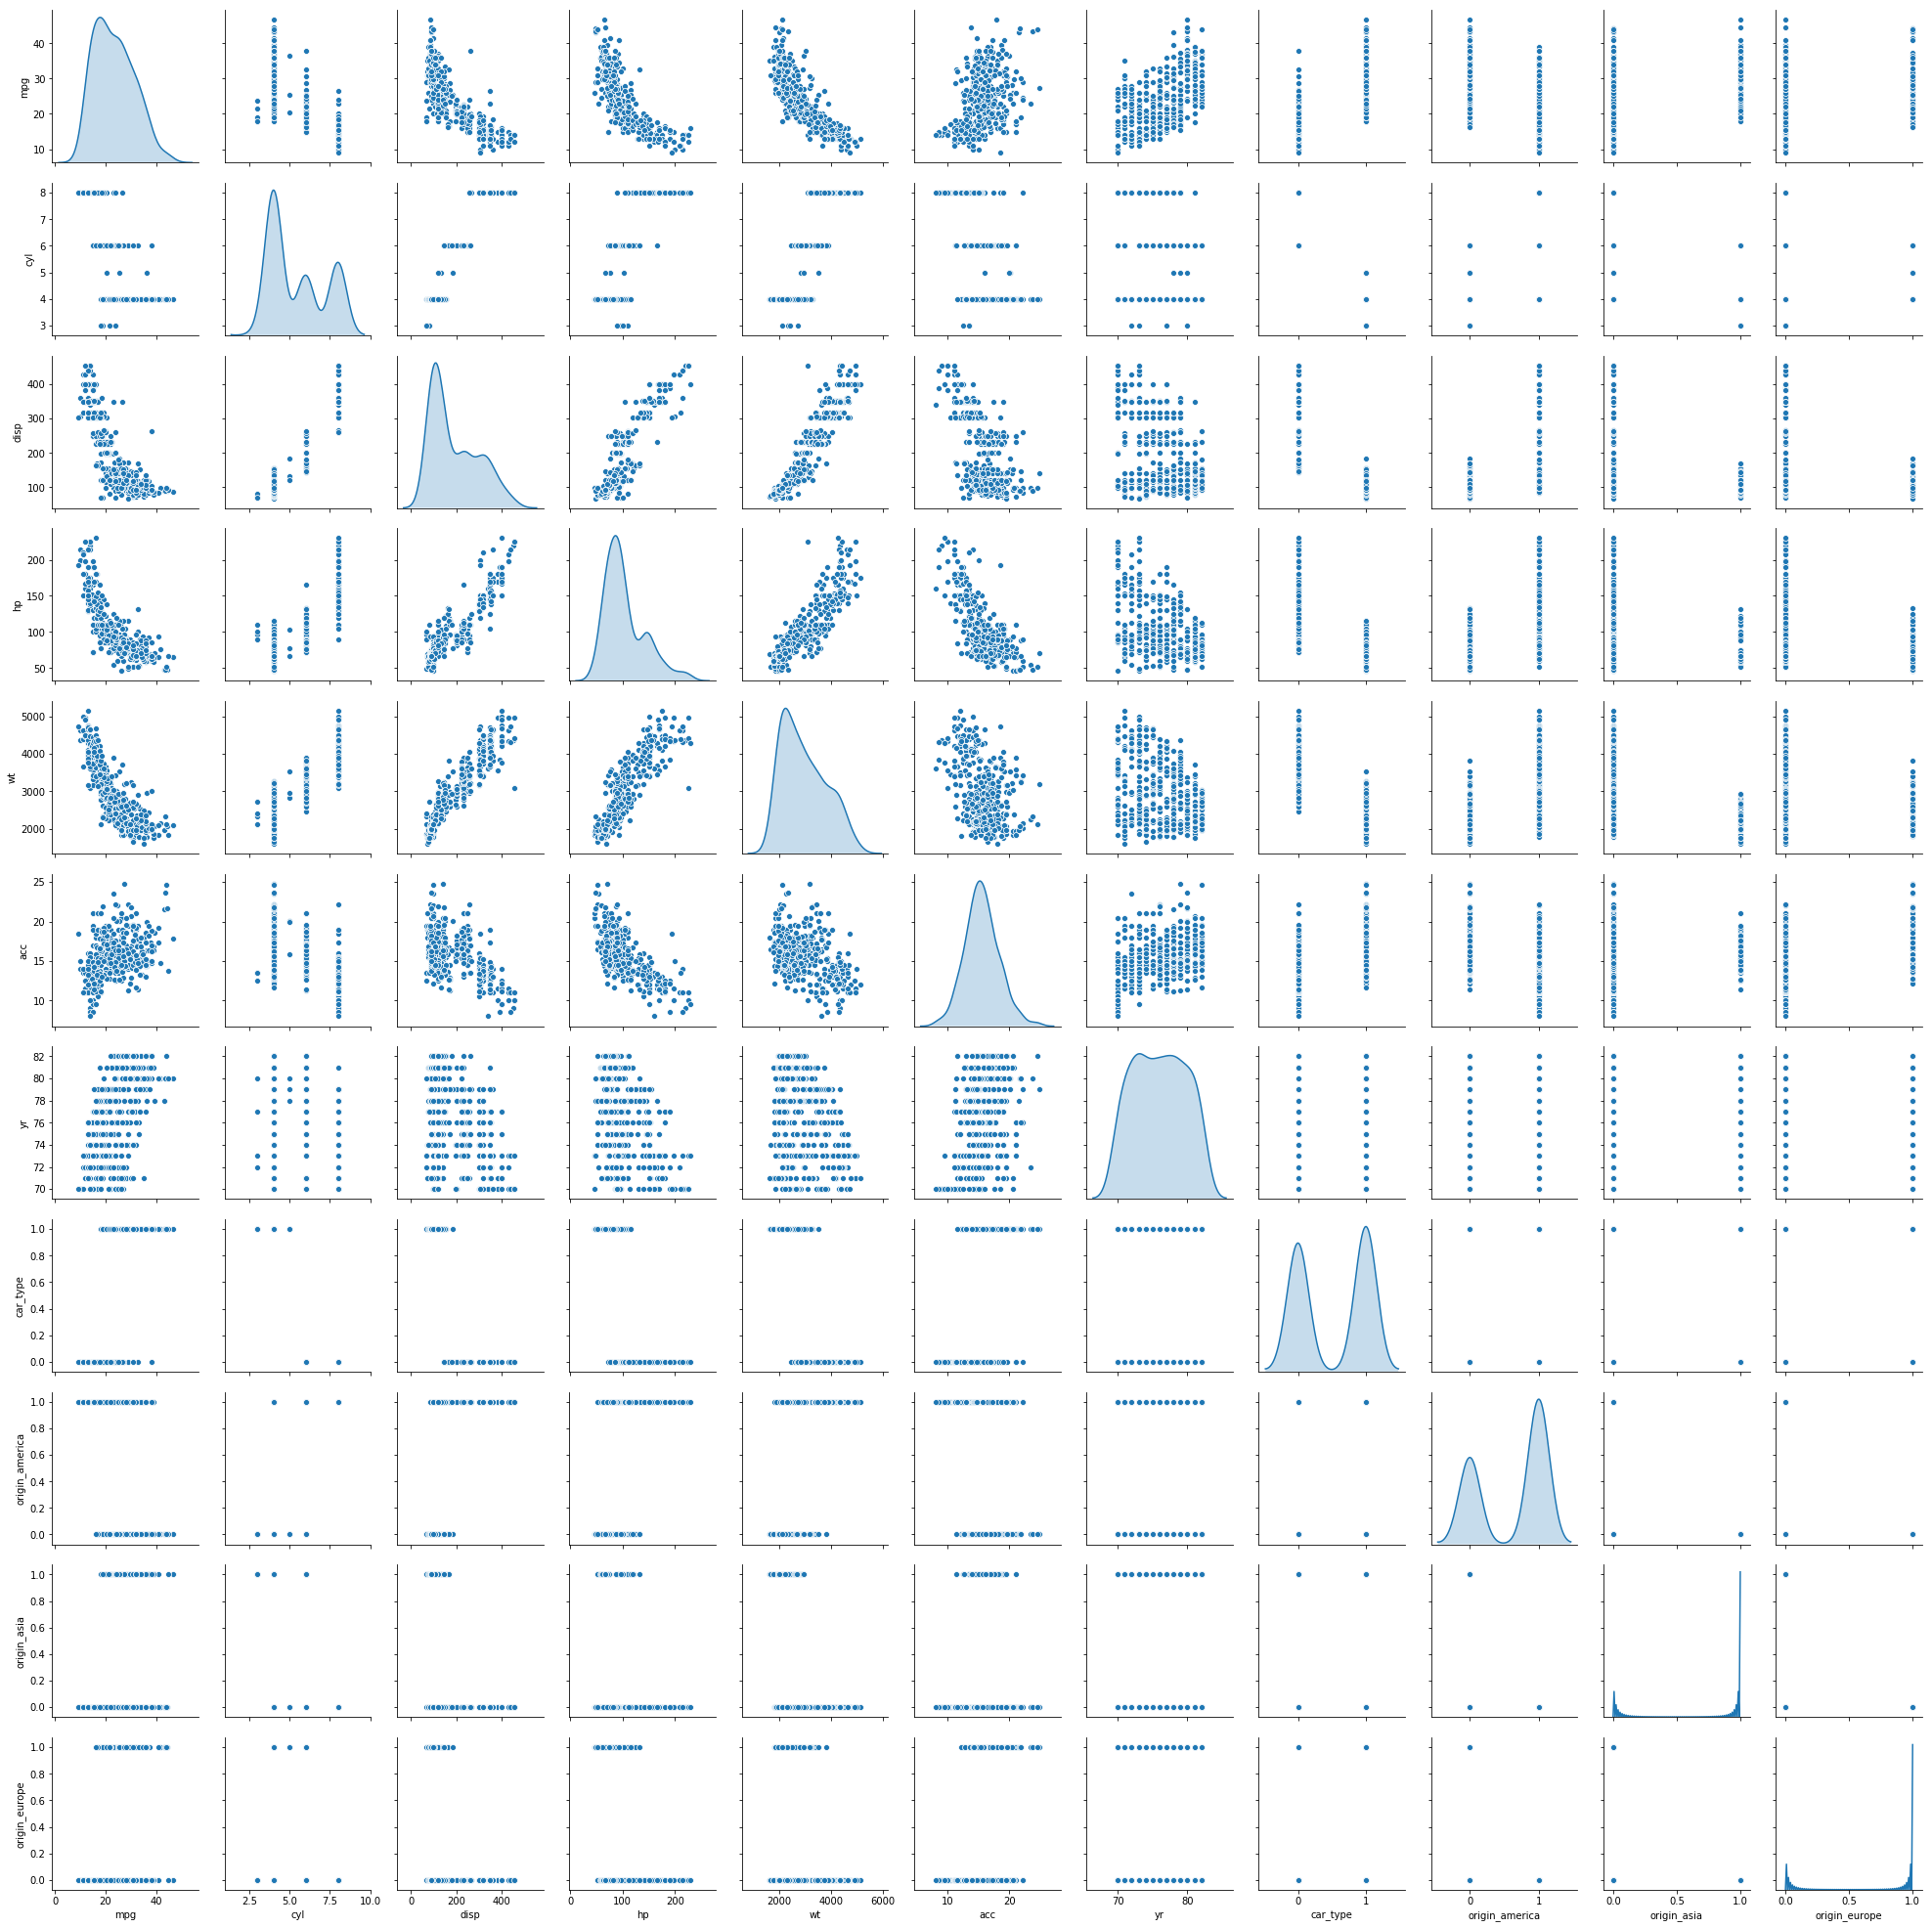

In [29]:
sns.pairplot(mpg_df,diag_kind='kde')

In [30]:
# copy all the predictor variable in x
x=mpg_df.drop(['mpg','cyl'],axis=1)
# copy the mpg column alone into the y dataframes.This is the dependent variable
y=mpg_df[['mpg']]

In [31]:
x.shape

(398, 9)

In [32]:
# let us break the x and y data frames into training set and test set.
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [34]:
x_train.shape

(278, 9)

In [36]:
y_train.shape

(278, 1)

In [37]:
x_test.shape

(120, 9)

In [38]:
y_test.shape

(120, 1)

In [42]:
m1=LinearRegression()
m1.fit(x_train,y_train)
y_predict=m1.predict(x_test)
m1.score(x_train,y_train)

0.829337716273302